In [1]:
import pandas as pd
#Importing pandas

In [2]:
a=pd.read_csv('parkinsons.csv')
#reading csv file 

In [44]:
a.shape
#printing the dimentions of data set

(195, 24)

In [4]:
a.dtypes
# Attributes in data set
#here we have 24 attributes and status is the result, 1 for positive and 0 for negative for ParkinsonDisease

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [5]:
a.head()
#pring the head of the data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
import seaborn as sns
#Importing Seaborn for better visulization of data

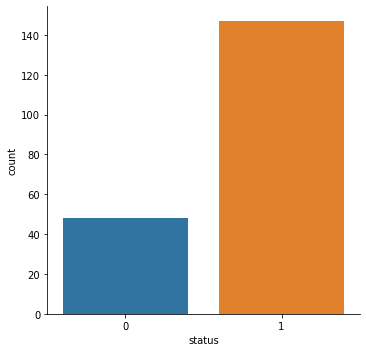

In [7]:
sns.catplot(x='status',kind='count',data=a)
#printing how many of them are positive for Parkinsons

C:\Users\arpit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
C:\Users\arpit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


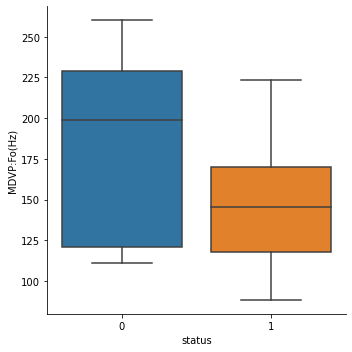

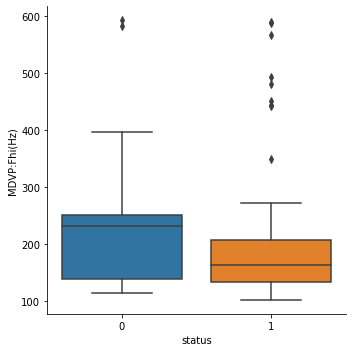

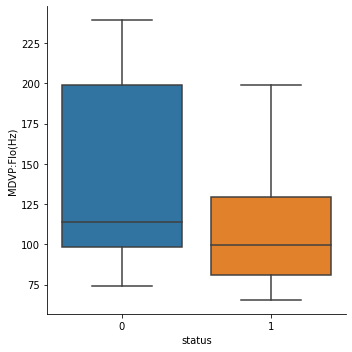

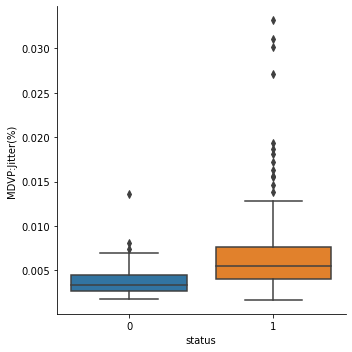

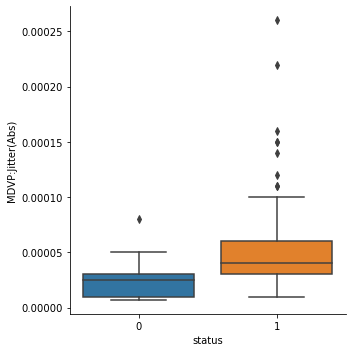

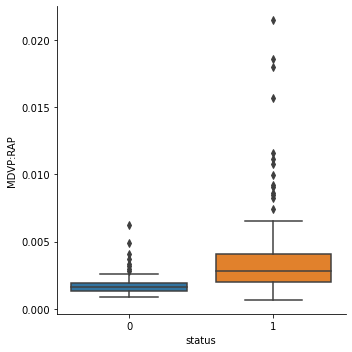

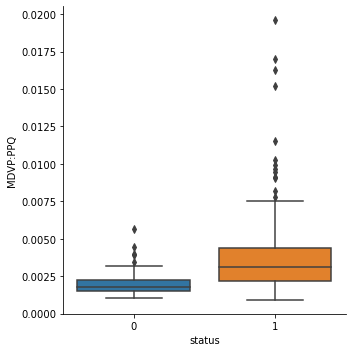

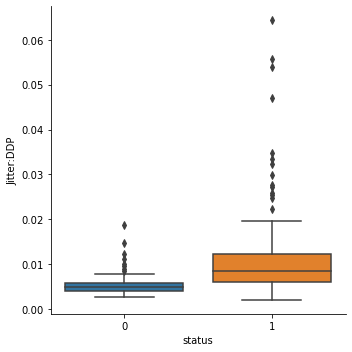

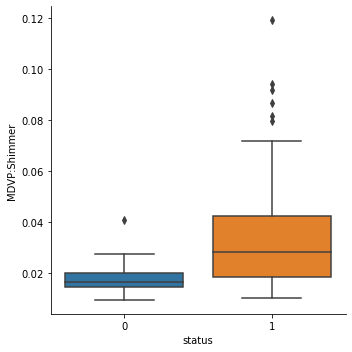

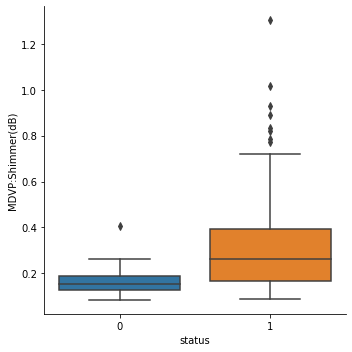

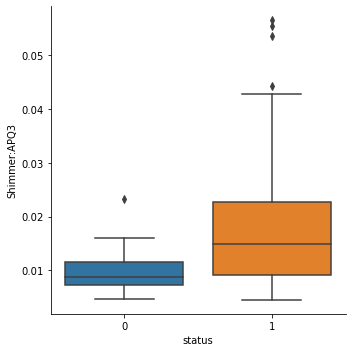

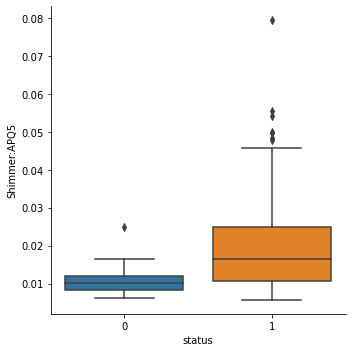

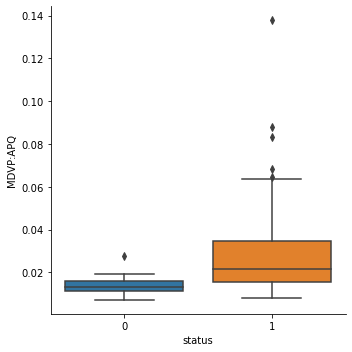

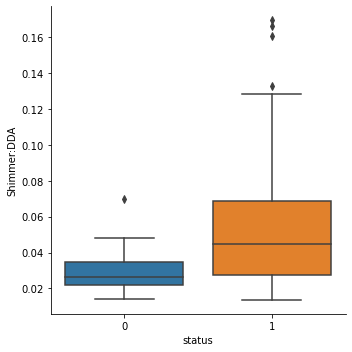

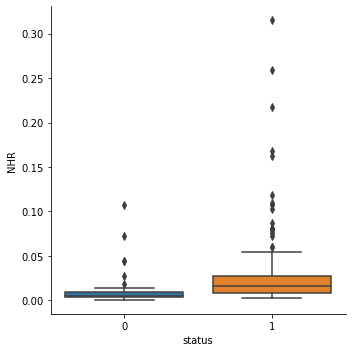

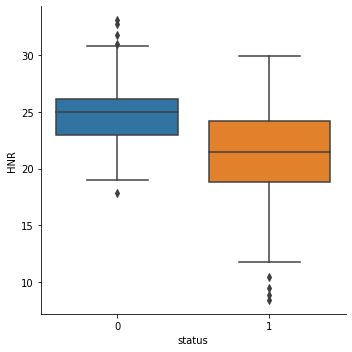

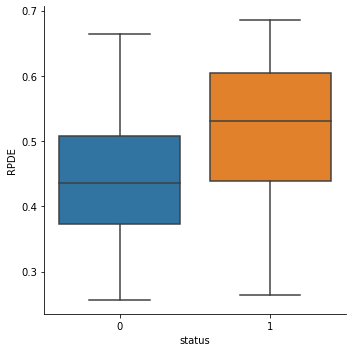

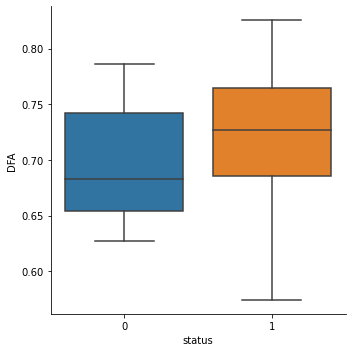

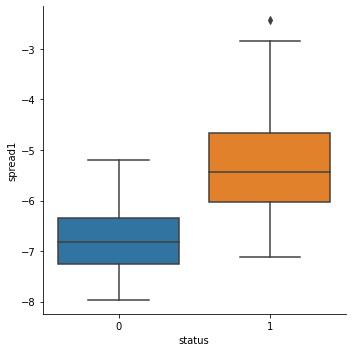

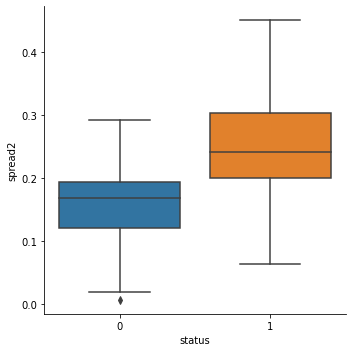

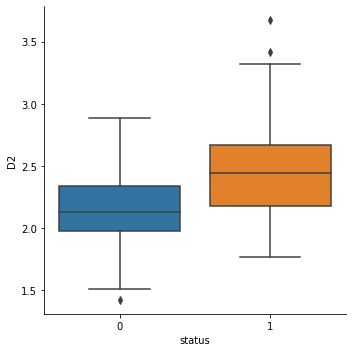

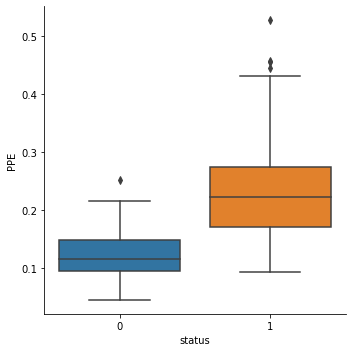

In [8]:

for i in a:
    if i != 'status' and i != 'name':
        sns.catplot(x='status',y=i,kind='box',data=a)
        
#The boxplot shown below helps in identifying the difference in values with respect to the 'status' of the patient.

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#importing numpy, MinMaxScaler

In [11]:
features=a.drop(['status','name'],axis=1)
labels=a['status']

#droping "name" attribute as it provides no useful insight.
#taking status values in labels variable

In [12]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels
#normalize the data using the minmax scaler to bring the feature variables within the range -1 to 1

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)
#Splitting the data into traning set and test set

In [25]:
from sklearn.svm import SVC

#Importing Support vector machine algorithm


In [28]:
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(x_train, y_train)
#fitting the data in svm algorithm
y_pred=svm.predict(x_test)
# print('misclassified samples: %d'%(y_test!=y_pred).sum())
# print('correctly classified samples: %d'%(y_test==y_pred).sum())



In [29]:
from sklearn.metrics import accuracy_score


In [45]:
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 84.61538461538461


In [46]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[ 4  6]
 [ 0 29]]


In [48]:
y_pred=pd.DataFrame(y_pred)
y_pred


,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0
